# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import Polynomial

In [ ]:
# Set matplotlib backend if needed
# pd.options.plotting.backend = "matplotlib"

In [10]:
# Load data
car_data = pd.read_csv('Cars93.csv', index_col = 0, keep_default_na=False)

### 1. Boxplot

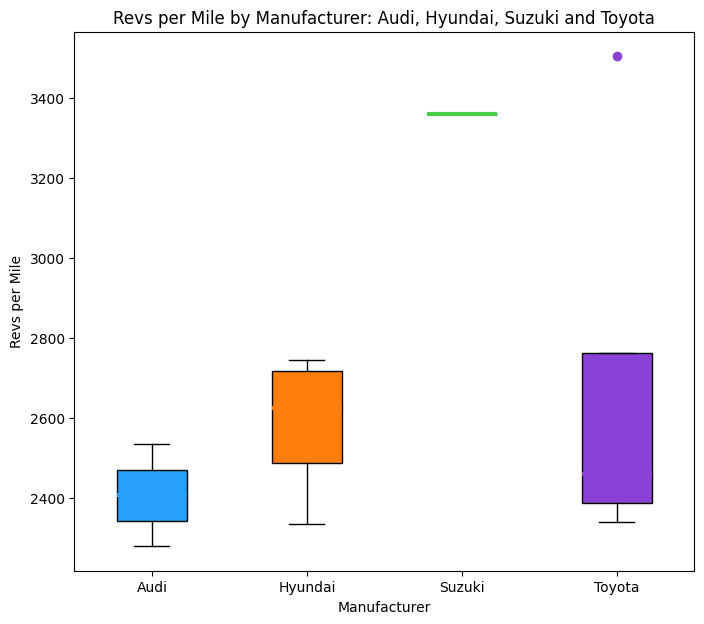

In [63]:
target_brands = ['Audi', 'Hyundai', 'Suzuki', 'Toyota']
target = car_data[car_data['Manufacturer'].isin(target_brands)]

data = [target[target['Manufacturer'] == brand]['Rev.per.mile'] for brand in target_brands]

plt.figure(figsize=(8, 7))
box = plt.boxplot(data, patch_artist=True, medianprops=dict(color='black'))
colors = ["#25a1f9", '#ff7f0e', "#47cd47", "#8942d5"]

for patch, color in zip(box['boxes'], colors):  # patches are boxplot boxes
    patch.set_facecolor(color)

for median, color in zip(box['medians'], colors):
    median.set_color(color)
    median.set_linewidth(3)

for flier, color in zip(box['fliers'], colors):  # fliers are outliers
    flier.set_markerfacecolor(color)
    flier.set_markeredgecolor(color)

plt.xticks(range(1, 5), target_brands)
plt.title('Revs per Mile by Manufacturer: Audi, Hyundai, Suzuki and Toyota')
plt.xlabel('Manufacturer')
plt.ylabel('Revs per Mile')
plt.show()

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?

**Boxplot answer:**

Toyota has the car with the highest revs. This is shown by the purple dot in the top right-hand corner of the figure. It is shown as a dot to indicate that it is an outlier in the data.

### 2. Histogram

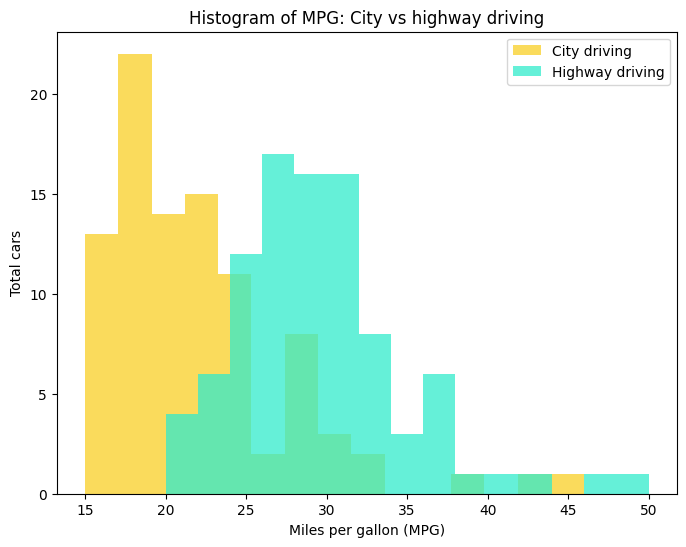

In [40]:
# Histogram of MPG
plt.figure(figsize=(8, 6))
plt.hist(car_data['MPG.city'], bins=15, alpha=0.75, label='City driving', color="#f9cf25")
plt.hist(car_data['MPG.highway'], bins=15, alpha=0.75, label='Highway driving', color="#32ebcc")
plt.xlabel('Miles per gallon (MPG)')
plt.ylabel('Total cars')
plt.title('Histogram of MPG: City vs highway driving')
plt.legend()
plt.show()

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:**

The figure shows that it is more fuel efficent to drive around on the highway. This is apparent from how the blue section of the figure, which is for highway driving, covers more of the area to the right, where higher miles per gallon (MPG) are shown.

### 3. Lineplot

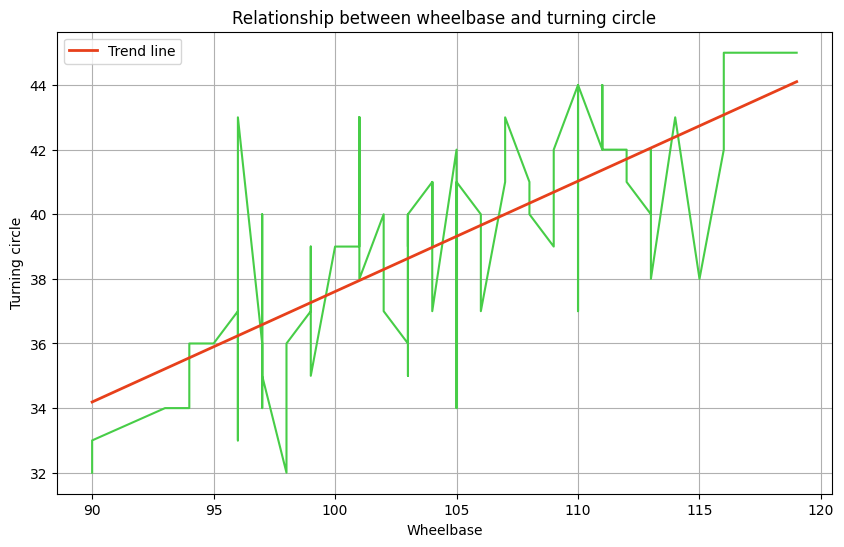

In [ ]:
# Lineplot (Wheelbase vs turning circle)
# Sort data by wheelbase
sorted_data = car_data.sort_values('Wheelbase')

# Add a trend line
coefs = Polynomial.fit(sorted_data['Wheelbase'], sorted_data['Turn.circle'], 1)
trend = coefs(sorted_data['Wheelbase'])

plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Wheelbase'], sorted_data['Turn.circle'], linestyle='-', color="#47cd47")
plt.plot(sorted_data['Wheelbase'], trend, color="#e7401b", linewidth=2, label='Trend line')
plt.xlabel('Wheelbase')
plt.ylabel('Turning circle')
plt.title('Relationship between wheelbase and turning circle')
plt.grid(True)
plt.legend()
plt.show()

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer:**  

As the wheelbase increases, so does the turning circle. This positive correlation is evident from the red trend line in the figure above. It means that cars with a larger turning circle cannot turn as sharply.

### 4. Barplot

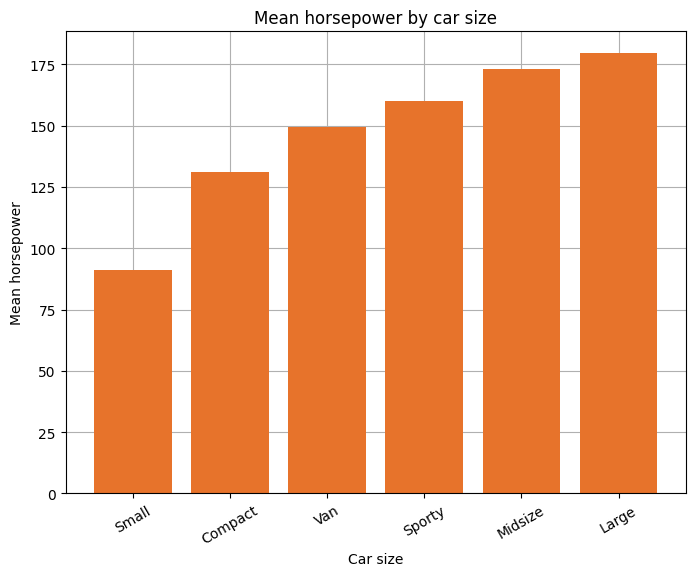

In [64]:
# Barplot for mean horsepower
mean_hp_size = car_data.groupby('Type')['Horsepower'].mean().sort_values()

plt.figure(figsize=(8, 6))
plt.grid(True)
bars = plt.bar(mean_hp_size.index, mean_hp_size.values, color="#e7732b")
plt.xlabel('Car size')
plt.ylabel('Mean horsepower')
plt.title('Mean horsepower by car size')
plt.xticks(rotation=30)
plt.gca().set_axisbelow(True)
plt.show()

**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:**

Large cars in the sample have higher horsepower. As can be seen from the figure above they have an average horsepower of over 175. 

However, it should be noted that vans, which are also large vehicles, have a mid-range horsepower of around 150. This shows that a large vehicle does not always have a higher horsepower, at least in this sample. This can be due to engine size differences and the need for fuel economy for vans compared to the large vehicles in the sample.

**References**

HyperionDev. (2025). Data Visualisation – Approach and Techniques. Course materials. Private repository, GitHub.

HyperionDev. (2025). Data Visualisation – Python Libraries. Course materials. Private repository, GitHub.

NumPy Developers. (2024). Polynomials. https://numpy.org/doc/stable/reference/routines.polynomials.html

matplotlib. (2024). Boxplots. https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py 

matplotlib. (2024). matplotlib.pyplot.https://matplotlib.org/stable/api/pyplot_api.html 

matplotlib. (2024). matplotlib.pyplot.hist. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
